In [9]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
path_to_data = "../data/original.csv"
df = pd.read_csv(path_to_data)
# Display the first few rows of the dataframe
df.head()

,courier_id,order_number,courier_location_timestamp,courier_lat,courier_lon,order_created_timestamp,restaurant_lat,restaurant_lon,restaurant_id
0,a98737cbhoho5012hoho4b5bhoho867fhoho8475c658546d,281289453,2021-04-02T04:30:42.328Z,50.484520,-104.618876,2021-04-02T04:20:42Z,50.483696,-104.614350,0
1,39a26fa0hohof428hoho47a4hohoa320hoho12e3d831c23a,280949566,2021-04-01T06:14:47.386Z,50.442573,-104.550463,2021-04-01T06:05:18Z,50.442422,-104.550487,1
2,3813235ehoho7a42hoho4601hohob7eahoho799e8af5b535,281328578,2021-04-02T05:48:57.224Z,50.495920,-104.635605,2021-04-02T05:13:26Z,50.496595,-104.635606,2
3,9f033953hohocd53hoho488ahohoaf51hohoc57943e499ed,281317998,2021-04-02T05:12:17.252Z,50.449445,-104.611521,2021-04-02T04:59:57Z,50.449504,-104.611074,3
4,56f65bc8hohoba54hoho47dfhohoa09chohof7464b5d9848,281314132,2021-04-02T05:15:38.266Z,50.495254,-104.666383,2021-04-02T04:54:53Z,50.495160,-104.665733,4


In [4]:
# Display the last few rows of the dataframe
df.tail()

,courier_id,order_number,courier_location_timestamp,courier_lat,courier_lon,order_created_timestamp,restaurant_lat,restaurant_lon,restaurant_id
20559,2f21e0c7hoho79b8hoho4ecdhohoaacbhohoad8b3e6565c2,281356256,2021-04-02T05:49:45.288Z,50.463855,-104.618036,2021-04-02T05:48:14Z,50.475204,-104.617475,267
20560,b3fe5a77hohofbb2hoho4c5fhohob9d5hoho1f87dd2ab9ed,281348386,2021-04-02T05:38:50.548Z,50.482136,-104.606574,2021-04-02T05:38:29Z,50.475204,-104.617475,267
20561,30a6cb7fhoho1825hoho407ehoho97f0hoho9d374a6b2f20,281353044,2021-04-02T05:46:23.316Z,50.473982,-104.631716,2021-04-02T05:44:18Z,50.475204,-104.617475,267
20562,30a6cb7fhoho1825hoho407ehoho97f0hoho9d374a6b2f20,281313038,2021-04-02T04:53:53.119Z,50.466229,-104.618022,2021-04-02T04:53:22Z,50.475204,-104.617475,267
20563,3a7fe5dehohob60dhoho465dhohoa53chohobc298c95375d,280969159,2021-04-01T06:41:21.230Z,50.457800,-104.618234,2021-04-01T06:39:45Z,50.475204,-104.617475,267


In [5]:
# Check the basic information of the dataset
info = df.info()

# Check for missing values
missing_values = df.isnull().sum()

missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20564 entries, 0 to 20563
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   courier_id                  20564 non-null  object 
 1   order_number                20564 non-null  int64  
 2   courier_location_timestamp  20564 non-null  object 
 3   courier_lat                 20564 non-null  float64
 4   courier_lon                 20564 non-null  float64
 5   order_created_timestamp     20564 non-null  object 
 6   restaurant_lat              20564 non-null  float64
 7   restaurant_lon              20564 non-null  float64
 8   restaurant_id               20564 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 1.4+ MB


courier_id                    0
order_number                  0
courier_location_timestamp    0
courier_lat                   0
courier_lon                   0
order_created_timestamp       0
restaurant_lat                0
restaurant_lon                0
restaurant_id                 0
dtype: int64

In [7]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Convert timestamp columns to datetime
df_cleaned['courier_location_timestamp'] = pd.to_datetime(df_cleaned['courier_location_timestamp'],format="mixed")
df_cleaned['order_created_timestamp'] = pd.to_datetime(df_cleaned['order_created_timestamp'])

# Generate summary statistics for numerical columns
summary_statistics = df_cleaned.describe()

summary_statistics

,order_number,courier_lat,courier_lon,restaurant_lat,restaurant_lon,restaurant_id
count,2.056400e+04,20564.000000,20564.000000,20564.000000,20564.000000,20564.000000
mean,2.812040e+08,50.452252,-104.607633,50.452438,-104.606504,177.332571
std,1.631263e+05,0.028192,0.043142,0.028423,0.043133,82.480991
min,2.809042e+08,50.395590,-104.709793,50.401919,-104.673057,0.000000
25%,2.809683e+08,50.440721,-104.642032,50.443048,-104.642027,105.000000
50%,2.812902e+08,50.447955,-104.618169,50.447979,-104.617686,214.000000
75%,2.813273e+08,50.475279,-104.571927,50.475204,-104.570465,245.000000
max,2.813678e+08,50.508916,-104.503366,50.498522,-104.511815,267.000000


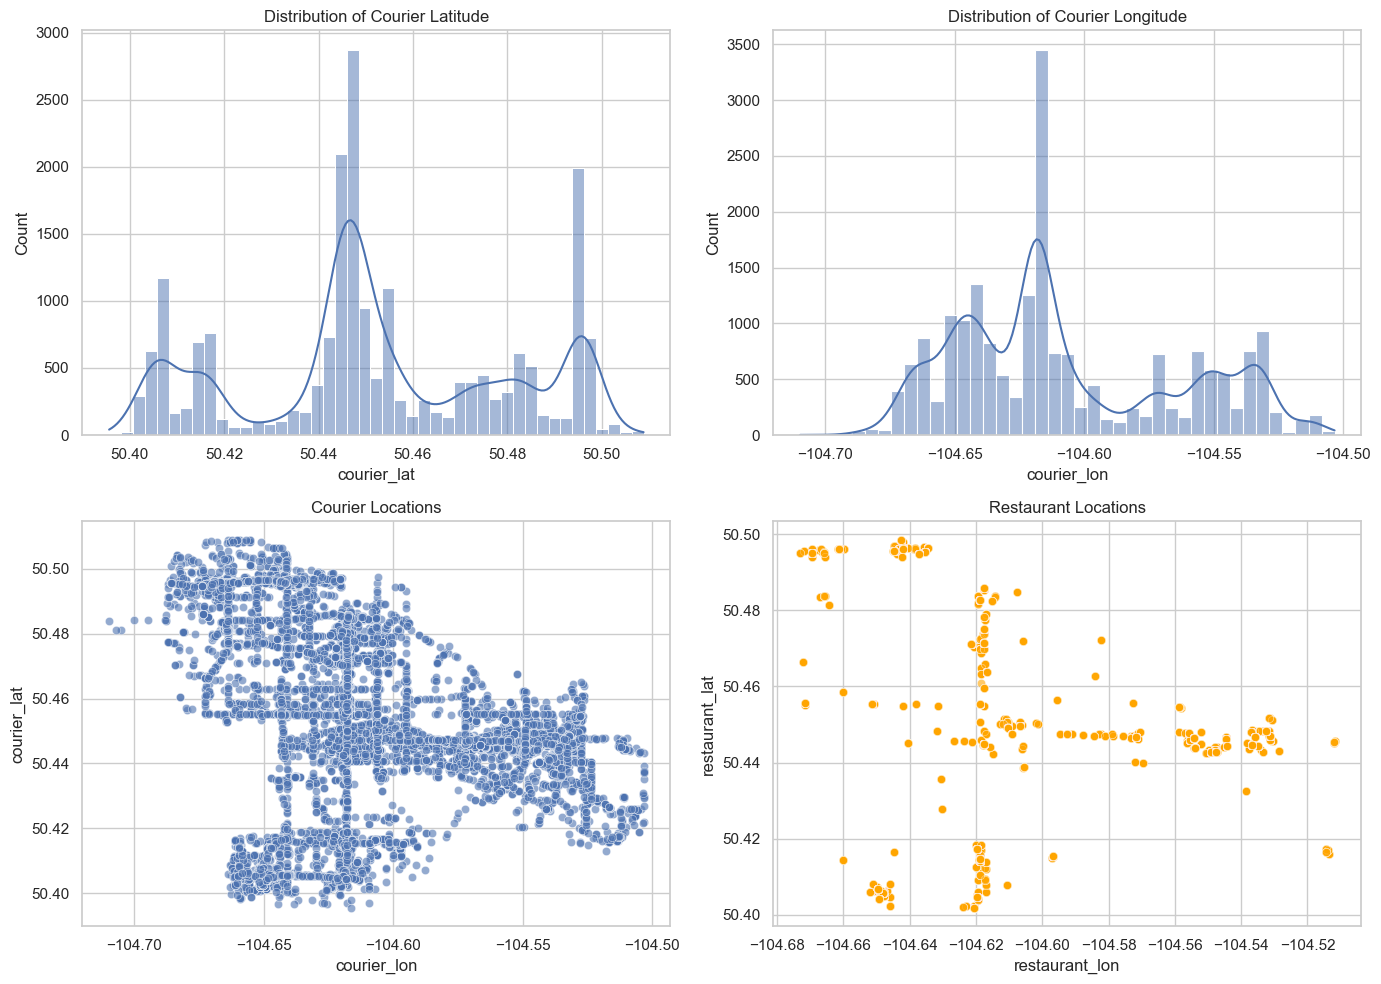

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of courier latitude
sns.histplot(df_cleaned['courier_lat'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Courier Latitude')

# Histogram of courier longitude
sns.histplot(df_cleaned['courier_lon'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Courier Longitude')

# Scatter plot of courier locations
sns.scatterplot(x='courier_lon', y='courier_lat', data=df_cleaned, ax=axs[1, 0], alpha=0.6)
axs[1, 0].set_title('Courier Locations')

# Scatter plot of restaurant locations
sns.scatterplot(x='restaurant_lon', y='restaurant_lat', data=df_cleaned, ax=axs[1, 1], alpha=0.6, color='orange')
axs[1, 1].set_title('Restaurant Locations')

plt.tight_layout()
plt.show()


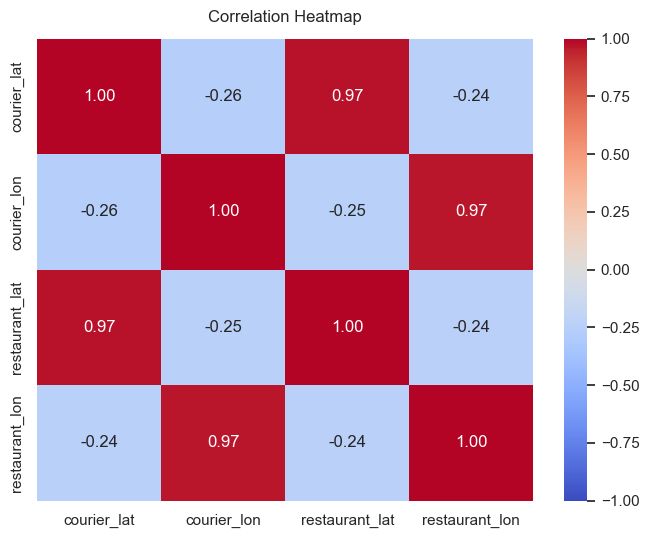

In [12]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned[['courier_lat', 'courier_lon', 'restaurant_lat', 'restaurant_lon']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

# Processed data after featrure extraction

In [13]:
# Load the new dataset
df_new = pd.read_csv('../data/processed.csv')

# Display the first few rows of the dataframe
df_new.head()

,courier_id,order_number,courier_location_timestamp,courier_lat,courier_lon,order_created_timestamp,restaurant_lat,restaurant_lon,restaurant_id,dist_to_restaurant,avg_dist_to_restaurants,Hdist_to_restaurant,avg_Hdist_to_restaurants,Five_Clusters_embedding,Five_Clusters_embedding_error,h3_index,date_day_number,date_hour_number,orders_busyness_by_h3_hour,restaurants_per_index
0,346,281289453,2021-04-02 04:30:42.328,50.484520,-104.618876,2021-04-02 04:20:42,50.483696,-104.614350,0,0.004600,0.056686,0.333173,5.267000,2,0.010828,28,92,4,422,51
1,116,280949566,2021-04-01 06:14:47.386,50.442573,-104.550463,2021-04-01 06:05:18,50.442422,-104.550487,1,0.000152,0.064685,0.016818,5.036710,3,0.060641,17,91,6,701,75
2,110,281328578,2021-04-02 05:48:57.224,50.495920,-104.635605,2021-04-02 05:13:26,50.496595,-104.635606,2,0.000675,0.067024,0.075033,6.284221,2,0.028480,6,92,5,941,59
3,328,281317998,2021-04-02 05:12:17.252,50.449445,-104.611521,2021-04-02 04:59:57,50.449504,-104.611074,3,0.000450,0.045752,0.032265,3.942031,3,0.001554,22,92,5,1026,69
4,178,281314132,2021-04-02 05:15:38.266,50.495254,-104.666383,2021-04-02 04:54:53,50.495160,-104.665733,4,0.000656,0.082413,0.047152,7.161970,0,0.001143,5,92,5,397,35


In [15]:
# Display the last few rows of the dataframe
df_new.tail()

,courier_id,order_number,courier_location_timestamp,courier_lat,courier_lon,order_created_timestamp,restaurant_lat,restaurant_lon,restaurant_id,dist_to_restaurant,avg_dist_to_restaurants,Hdist_to_restaurant,avg_Hdist_to_restaurants,Five_Clusters_embedding,Five_Clusters_embedding_error,h3_index,date_day_number,date_hour_number,orders_busyness_by_h3_hour,restaurants_per_index
20559,93,281356256,2021-04-02 05:49:45.288,50.463855,-104.618036,2021-04-02 05:48:14,50.475204,-104.617475,267,0.011363,0.048363,1.262957,4.254325,2,0.009903,22,92,5,1026,69
20560,363,281348386,2021-04-02 05:38:50.548,50.482136,-104.606574,2021-04-02 05:38:29,50.475204,-104.617475,267,0.012918,0.055359,1.090740,5.110064,2,0.013949,28,92,5,761,51
20561,97,281353044,2021-04-02 05:46:23.316,50.473982,-104.631716,2021-04-02 05:44:18,50.475204,-104.617475,267,0.014293,0.055344,1.017159,4.891502,2,0.013994,28,92,5,761,51
20562,97,281313038,2021-04-02 04:53:53.119,50.466229,-104.618022,2021-04-02 04:53:22,50.475204,-104.617475,267,0.008992,0.048937,0.999056,4.328311,2,0.007530,28,92,4,422,51
20563,121,280969159,2021-04-01 06:41:21.230,50.457800,-104.618234,2021-04-01 06:39:45,50.475204,-104.617475,267,0.017420,0.047331,1.936516,4.114795,3,0.010475,22,91,6,694,69


In [16]:
# Check the basic information of the dataset
info_df_new = df_new.info()

# Check for missing values
missing_values_df_new = df_new.isnull().sum()

missing_values_df_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20564 entries, 0 to 20563
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   courier_id                     20564 non-null  int64  
 1   order_number                   20564 non-null  int64  
 2   courier_location_timestamp     20564 non-null  object 
 3   courier_lat                    20564 non-null  float64
 4   courier_lon                    20564 non-null  float64
 5   order_created_timestamp        20564 non-null  object 
 6   restaurant_lat                 20564 non-null  float64
 7   restaurant_lon                 20564 non-null  float64
 8   restaurant_id                  20564 non-null  int64  
 9   dist_to_restaurant             20564 non-null  float64
 10  avg_dist_to_restaurants        20564 non-null  float64
 11  Hdist_to_restaurant            20564 non-null  float64
 12  avg_Hdist_to_restaurants       20564 non-null 

courier_id                       0
order_number                     0
courier_location_timestamp       0
courier_lat                      0
courier_lon                      0
order_created_timestamp          0
restaurant_lat                   0
restaurant_lon                   0
restaurant_id                    0
dist_to_restaurant               0
avg_dist_to_restaurants          0
Hdist_to_restaurant              0
avg_Hdist_to_restaurants         0
Five_Clusters_embedding          0
Five_Clusters_embedding_error    0
h3_index                         0
date_day_number                  0
date_hour_number                 0
orders_busyness_by_h3_hour       0
restaurants_per_index            0
dtype: int64

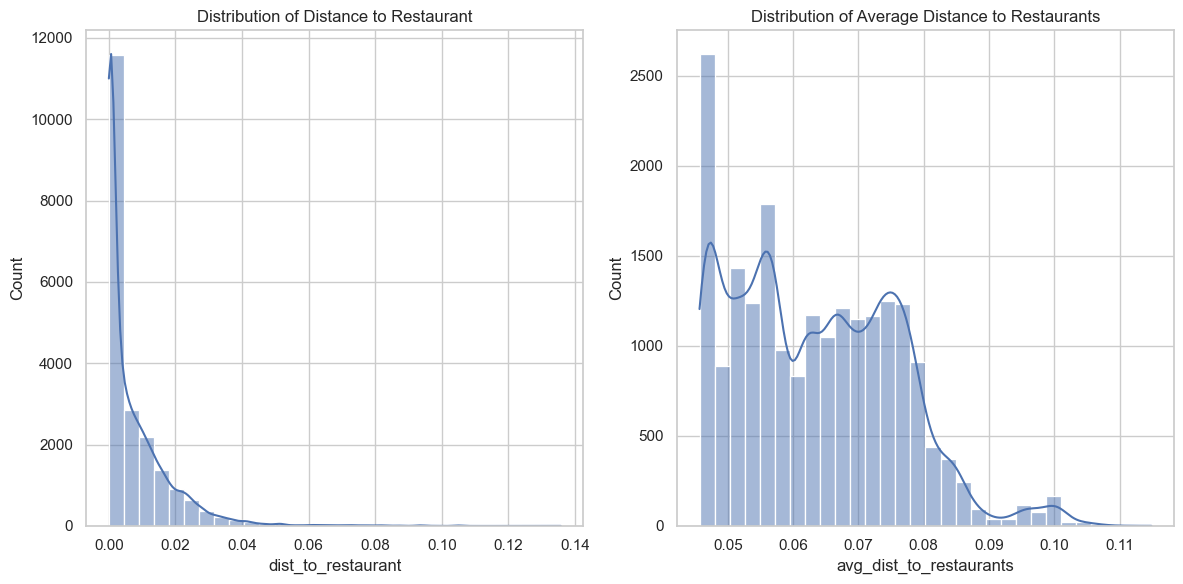

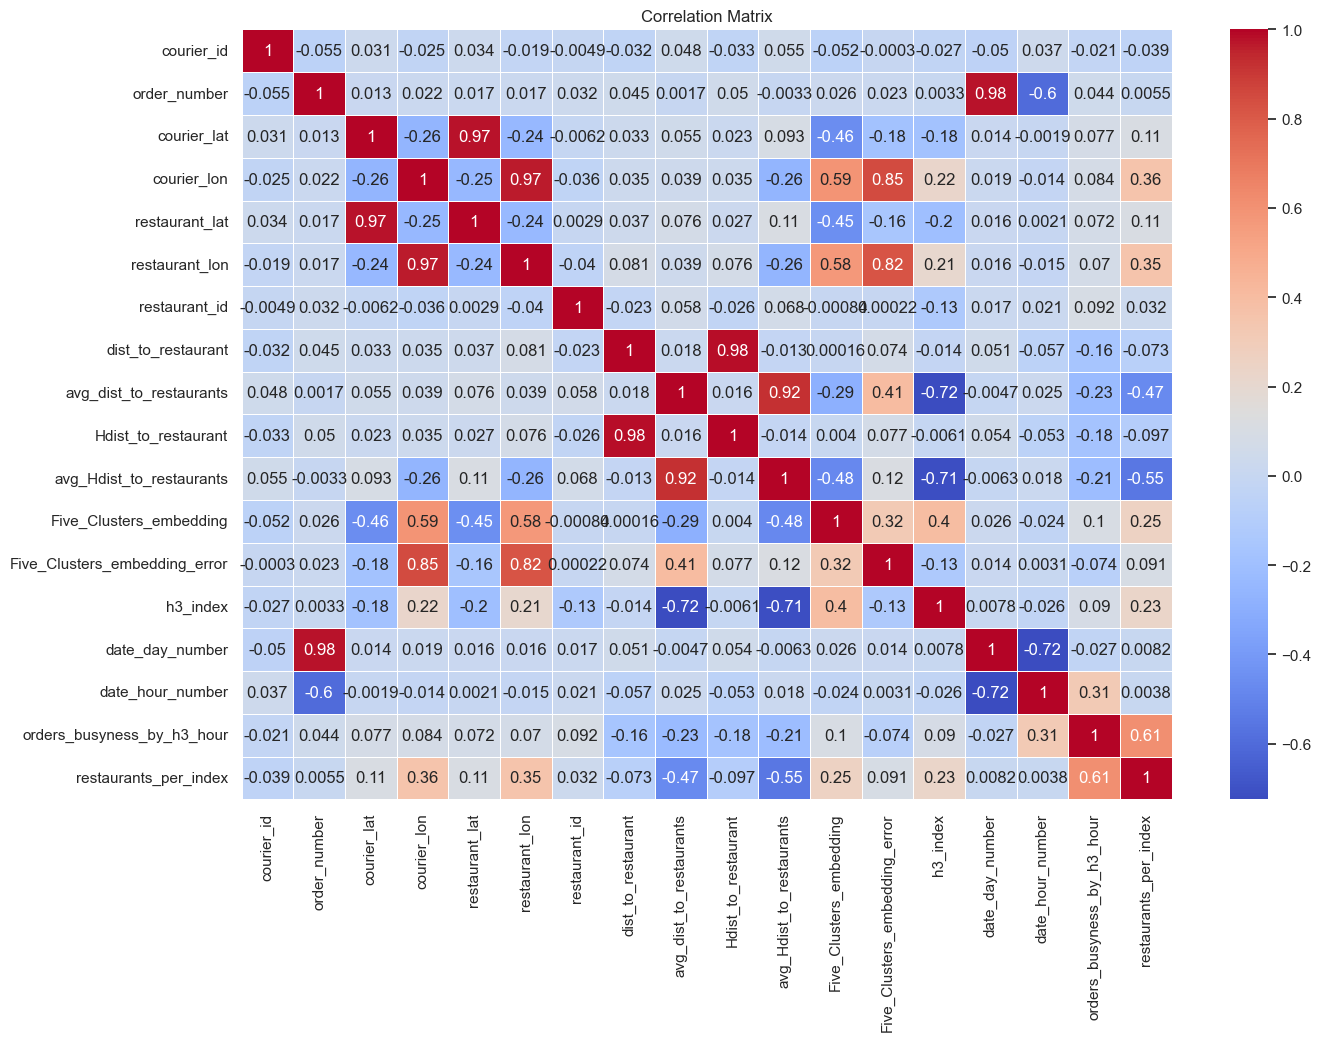

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# EDA: Visualizing distributions and relationships

# Distribution of distances to restaurant
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_new['dist_to_restaurant'], bins=30, kde=True)
plt.title('Distribution of Distance to Restaurant')

# Distribution of average distance to restaurants
plt.subplot(1, 2, 2)
sns.histplot(df_new['avg_dist_to_restaurants'], bins=30, kde=True)
plt.title('Distribution of Average Distance to Restaurants')
plt.tight_layout()
plt.show()

# Correlation Matrix
numeric_df_new = df_new.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df_new.corr()  # Compute correlation matrix for numeric columns only


# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


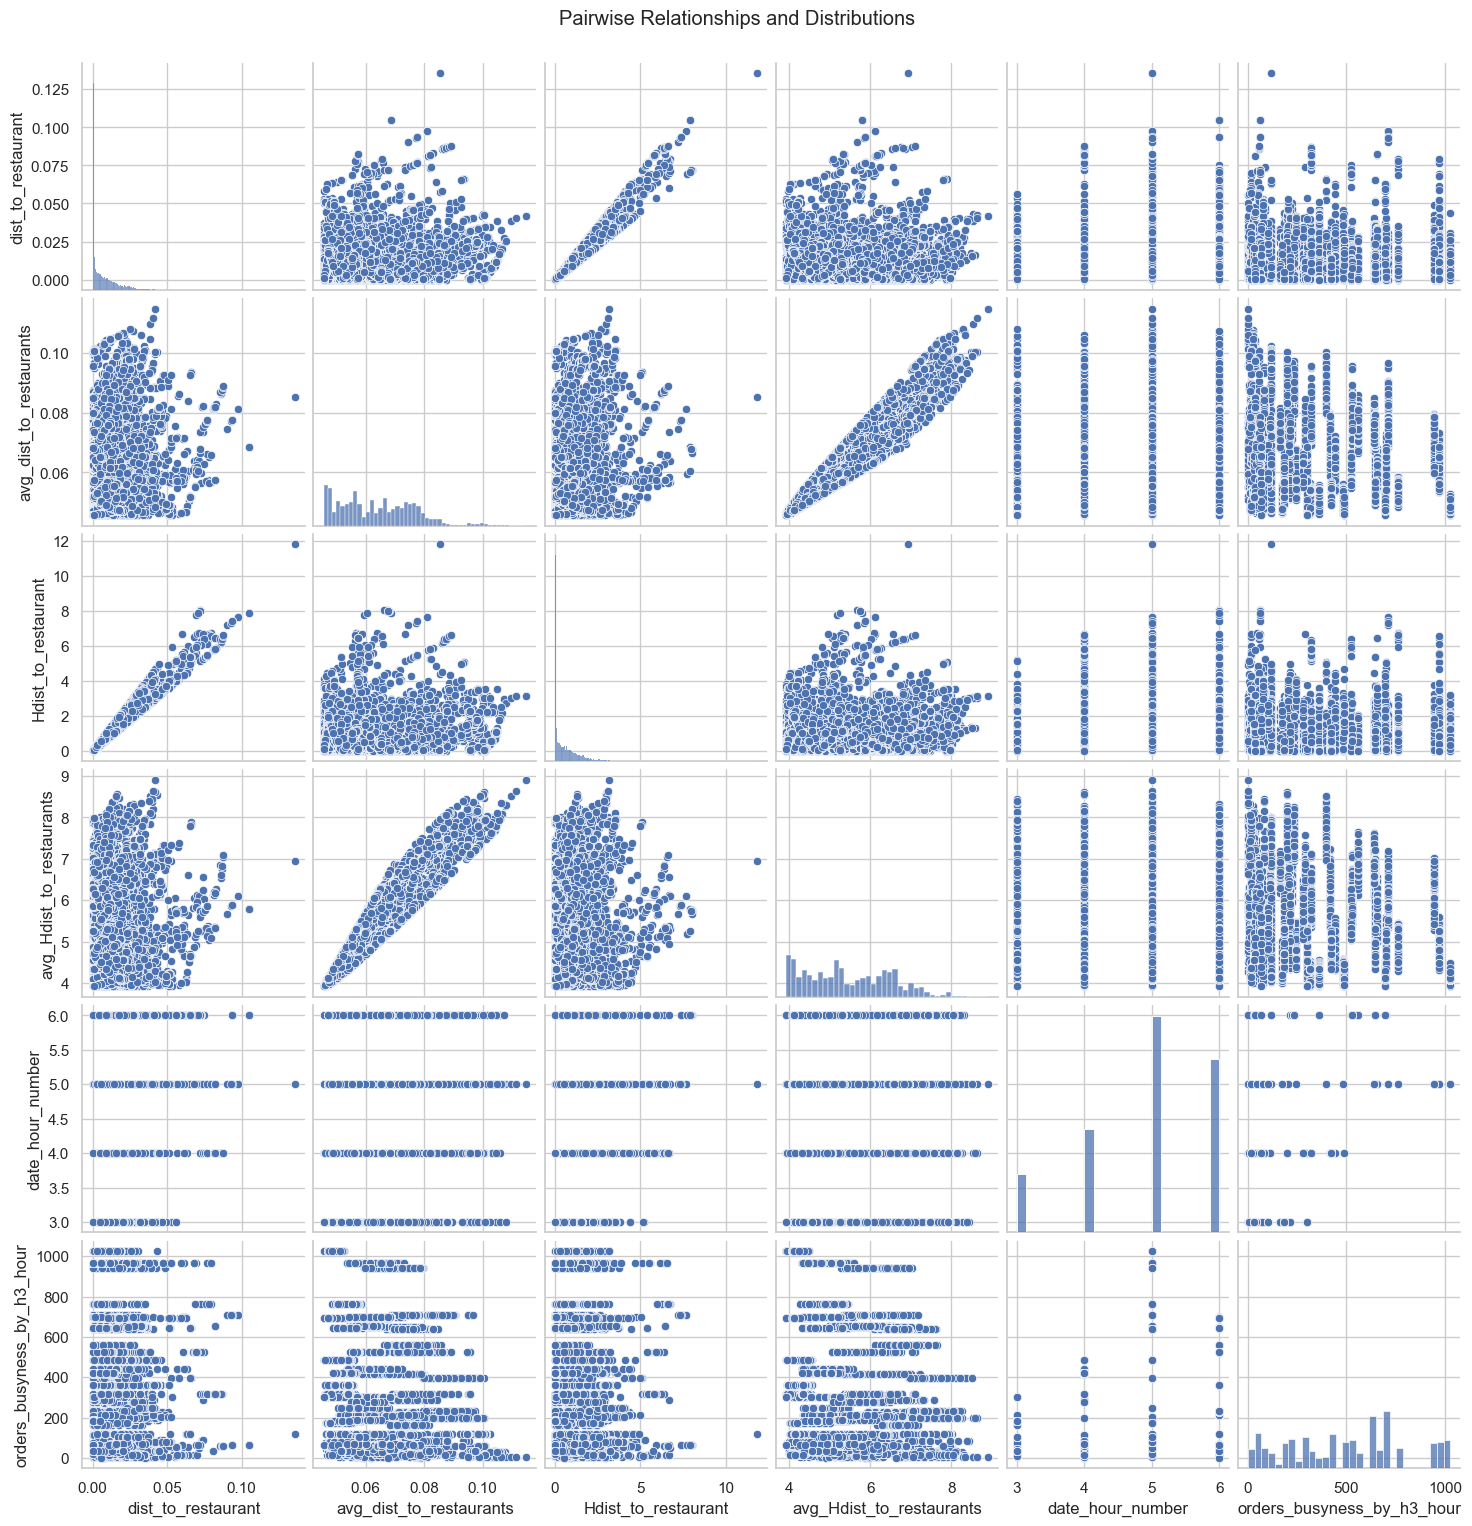

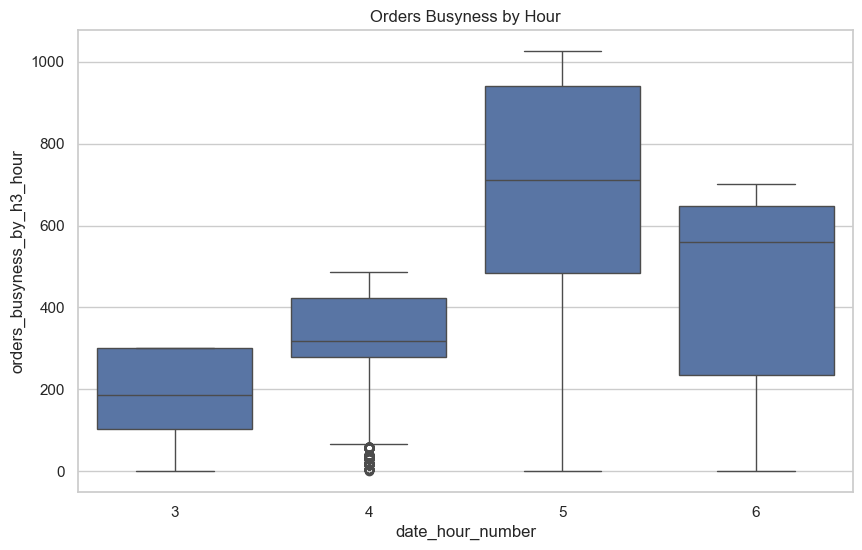

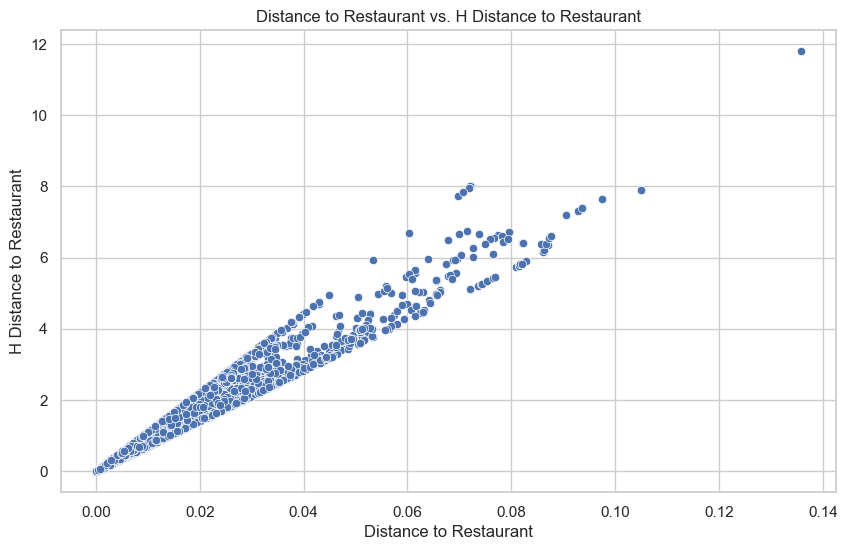

In [23]:
# To draw more insights using seaborn, we'll create a few more visualizations focusing on different aspects of the dataset.

# Pairplot for a subset of variables to see pairwise relationships
# Selecting a few variables for clarity in visualization
subset_df = df_new[['dist_to_restaurant', 'avg_dist_to_restaurants', 'Hdist_to_restaurant', 'avg_Hdist_to_restaurants', 'date_hour_number', 'orders_busyness_by_h3_hour']]

# Pairplot to visualize pairwise relationships and distributions
sns.pairplot(subset_df)
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()

# Boxplot for orders busyness by hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='date_hour_number', y='orders_busyness_by_h3_hour', data=df_new)
plt.title('Orders Busyness by Hour')
plt.show()

# Scatter plot for Distance to Restaurant vs. H Distance to Restaurant
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dist_to_restaurant', y='Hdist_to_restaurant', data=df_new)
plt.title('Distance to Restaurant vs. H Distance to Restaurant')
plt.xlabel('Distance to Restaurant')
plt.ylabel('H Distance to Restaurant')
plt.show()


C:\Users\Hafiz\AppData\Local\Temp\ipykernel_41224\297507202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='date_hour_number', data=df_new, palette="viridis")


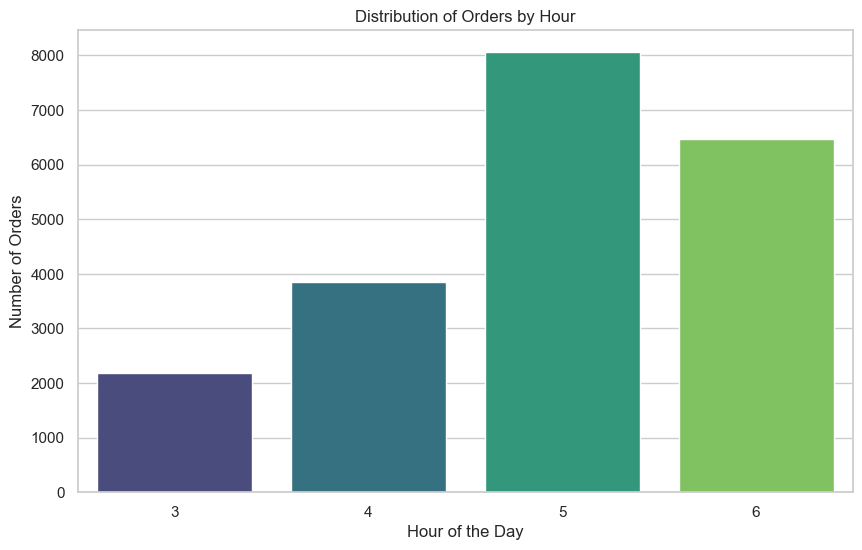

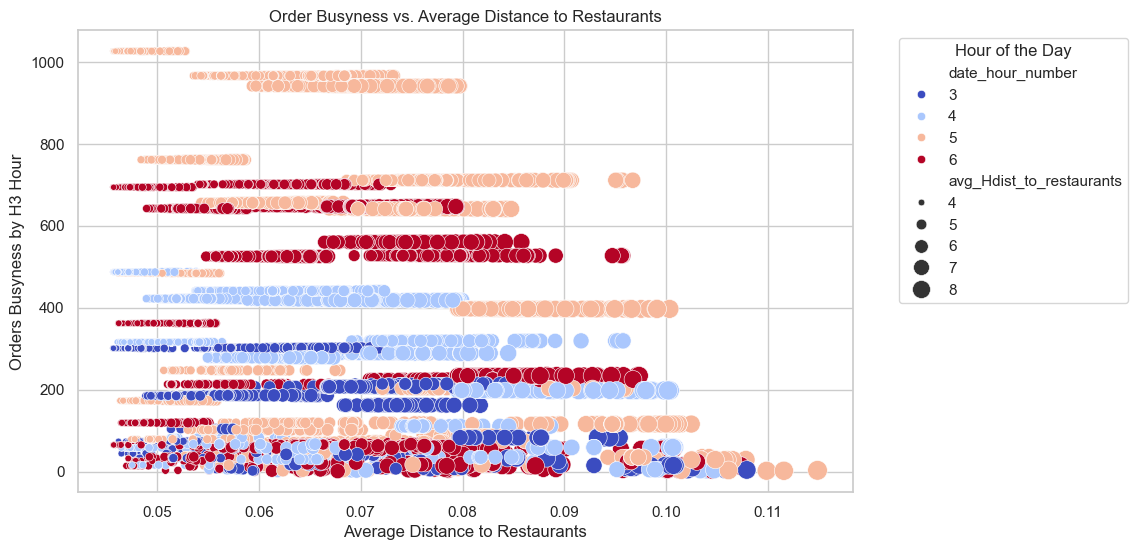

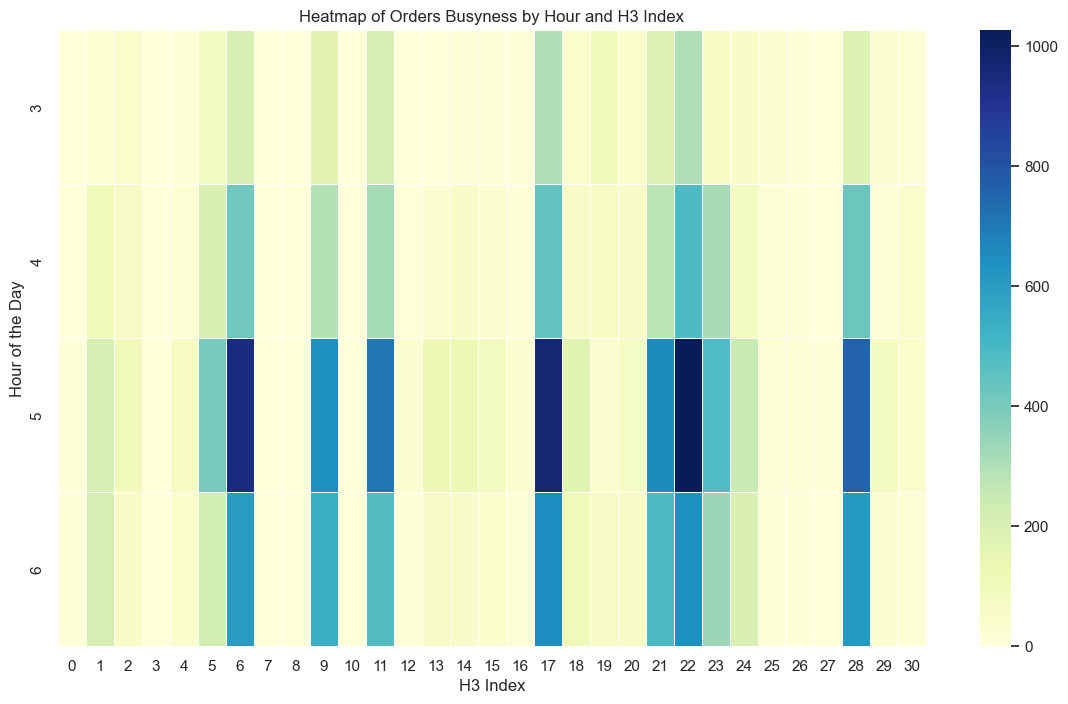

In [24]:
# Let's create more plots to explore other aspects of the dataset.

# Distribution of orders by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='date_hour_number', data=df_new, palette="viridis")
plt.title('Distribution of Orders by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

# Relationship between Order Busyness and Average Distance to Restaurants
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_dist_to_restaurants', y='orders_busyness_by_h3_hour', data=df_new, hue='date_hour_number', palette="coolwarm", size='avg_Hdist_to_restaurants', sizes=(20, 200))
plt.title('Order Busyness vs. Average Distance to Restaurants')
plt.xlabel('Average Distance to Restaurants')
plt.ylabel('Orders Busyness by H3 Hour')
plt.legend(title='Hour of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Heatmap of Orders Busyness by Hour and H3 Index
# Creating a pivot table to aggregate the data
pivot_table = df_new.pivot_table(values='orders_busyness_by_h3_hour', index='date_hour_number', columns='h3_index', aggfunc='mean').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Orders Busyness by Hour and H3 Index')
plt.xlabel('H3 Index')
plt.ylabel('Hour of the Day')
plt.show()
